In [1]:
import pandas as pd

## 数据载入

载入以下数据集：

* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-ens33.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-mem.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-cpu.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-ens33.txt
* https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-mem.txt

创建一个函数载入数据

In [2]:
def load_sysstat_dataset(url):
  df = pd.read_table(
    url,
    sep='\s+',
    skiprows=2,
  )
  return df

In [3]:
loaded = load_sysstat_dataset('https://github.com/genzj/data-analysis-course/raw/main/data/ch-04/sysstat-20210815-020609-cpu.txt')
print(loaded.dtypes)
loaded.head()

02:06:09     object
AM           object
CPU          object
%user       float64
%nice       float64
%system     float64
%iowait     float64
%steal      float64
%idle       float64
dtype: object


,02:06:09,AM,CPU,%user,%nice,%system,%iowait,%steal,%idle
0,02:06:14,AM,all,0.20,0.0,0.20,0.0,0.0,99.60
1,02:06:19,AM,all,0.00,0.0,0.00,0.0,0.0,100.00
2,02:06:24,AM,all,0.20,0.0,0.20,0.0,0.0,99.60
3,02:06:29,AM,all,0.81,0.0,0.81,0.0,0.0,98.37
4,02:06:34,AM,all,0.20,0.0,0.61,0.2,0.0,98.99


## 转换为时间戳类型

注意到第一列是时间戳，第二列是AM/PM标志，但目前是以string类型来载入的。编写函数`load_timestamp_sysstat`，实现以下功能：

* 读取数据（已写好）
* 将数据第0列和第1列拼接到一起，形成完整的时间戳
* 使用`pd.to_datetime`解析时间戳，注意指定时间格式（已写好）到`format`参数
* 将解析好的时间戳设置为数据的index
* 丢弃原数据的第0和第1列（解析前的时间字符串）

In [6]:
def load_timestamp_sysstat(url):
  timeformat = '%I:%M:%S %p'
  df = load_sysstat_dataset(url)
  timestr = df.iloc[:, 0] + " " + df.iloc[:, 1]
  df.index = pd.to_datetime(timestr, format=timeformat)
  return df.drop(columns=df.columns[[0, 1]])

# 测试
load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt').head()

,CPU,%user,%nice,%system,%iowait,%steal,%idle
1900-01-01 02:06:14,all,0.20,0.0,0.20,0.0,0.0,99.60
1900-01-01 02:06:19,all,0.00,0.0,0.00,0.0,0.0,100.00
1900-01-01 02:06:24,all,0.20,0.0,0.20,0.0,0.0,99.60
1900-01-01 02:06:29,all,0.81,0.0,0.81,0.0,0.0,98.37
1900-01-01 02:06:34,all,0.20,0.0,0.61,0.2,0.0,98.99


用新函数载入所有数据

In [7]:
cpu_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-cpu.txt')
mem_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-mem.txt')
net_1 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-020609-ens33.txt')
cpu_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-cpu.txt')
mem_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-mem.txt')
net_2 = load_timestamp_sysstat('https://raw.githubusercontent.com/genzj/data-analysis-course/main/data/ch-04/sysstat-20210815-023757-ens33.txt')

## 数据拼接

### 纵向拼接：

* 把cpu_1和cpu_2拼接为cpu
* 把mem_1和mem_2拼接为mem
* 把net_1和net_2拼接为net


In [8]:
cpu = pd.concat([cpu_1, cpu_2])
mem = pd.concat([mem_1, mem_2])
net = pd.concat([net_1, net_2])

### 横向拼接：

将cpu、mem、net拼接为一个名为ans的大表。

方法一：用concat拼接，参数axis='columns'，但需要处理缺失值

In [18]:
ans = pd.concat([cpu, mem, net], axis='columns').dropna()

# 检查是否有缺失数据
print('data with NaN:', ans.isna().any(axis=1).sum())

ans.head()

data with NaN: 0


,CPU,%user,%nice,%system,%iowait,%steal,%idle,kbmemfree,kbavail,kbmemused,%memused,kbbuffers,kbcached,kbcommit,%commit,kbactive,kbinact,kbdirty,IFACE,rxpck/s,txpck/s,rxkB/s,txkB/s,rxcmp/s,txcmp/s,rxmcst/s,%ifutil
1900-01-01 02:06:14,all,0.20,0.0,0.20,0.0,0.0,99.60,1942904.0,2868400.0,792508.0,19.80,74208.0,1005040.0,2222904.0,55.55,967696.0,741180.0,344.0,ens33,0.2,0.0,0.02,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:19,all,0.00,0.0,0.00,0.0,0.0,100.00,1942148.0,2867652.0,793244.0,19.82,74216.0,1005048.0,2226440.0,55.64,967712.0,741180.0,348.0,ens33,0.2,0.0,0.02,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:24,all,0.20,0.0,0.20,0.0,0.0,99.60,1942148.0,2867660.0,793244.0,19.82,74224.0,1005040.0,2226440.0,55.64,967720.0,741180.0,136.0,ens33,0.4,0.0,0.04,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:29,all,0.81,0.0,0.81,0.0,0.0,98.37,1943664.0,2869188.0,791716.0,19.78,74240.0,1005036.0,2226440.0,55.64,966500.0,740924.0,224.0,ens33,26.6,1.2,9.13,0.22,0.0,0.0,0.0,0.01
1900-01-01 02:06:34,all,0.20,0.0,0.61,0.2,0.0,98.99,1943660.0,2869220.0,791676.0,19.78,74244.0,1005060.0,2224564.0,55.59,966644.0,740848.0,224.0,ens33,0.4,0.2,0.04,0.01,0.0,0.0,0.0,0.00


方法二：用merge拼接（使用默认的内连接），无需处理缺失，但需要调用两次

In [21]:
ans = pd.merge(
    cpu, mem, left_index=True, right_index=True
)

ans = pd.merge(
    ans, net, left_index=True, right_index=True
)

ans.head()

,CPU,%user,%nice,%system,%iowait,%steal,%idle,kbmemfree,kbavail,kbmemused,%memused,kbbuffers,kbcached,kbcommit,%commit,kbactive,kbinact,kbdirty,IFACE,rxpck/s,txpck/s,rxkB/s,txkB/s,rxcmp/s,txcmp/s,rxmcst/s,%ifutil
1900-01-01 02:06:14,all,0.20,0.0,0.20,0.0,0.0,99.60,1942904,2868400,792508,19.80,74208,1005040,2222904,55.55,967696,741180,344,ens33,0.2,0.0,0.02,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:19,all,0.00,0.0,0.00,0.0,0.0,100.00,1942148,2867652,793244,19.82,74216,1005048,2226440,55.64,967712,741180,348,ens33,0.2,0.0,0.02,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:24,all,0.20,0.0,0.20,0.0,0.0,99.60,1942148,2867660,793244,19.82,74224,1005040,2226440,55.64,967720,741180,136,ens33,0.4,0.0,0.04,0.00,0.0,0.0,0.0,0.00
1900-01-01 02:06:29,all,0.81,0.0,0.81,0.0,0.0,98.37,1943664,2869188,791716,19.78,74240,1005036,2226440,55.64,966500,740924,224,ens33,26.6,1.2,9.13,0.22,0.0,0.0,0.0,0.01
1900-01-01 02:06:34,all,0.20,0.0,0.61,0.2,0.0,98.99,1943660,2869220,791676,19.78,74244,1005060,2224564,55.59,966644,740848,224,ens33,0.4,0.2,0.04,0.01,0.0,0.0,0.0,0.00


## 降采样

* 按每1分钟的时间间隔对数据进行降采样
* 取出每分钟的最大值、平均值

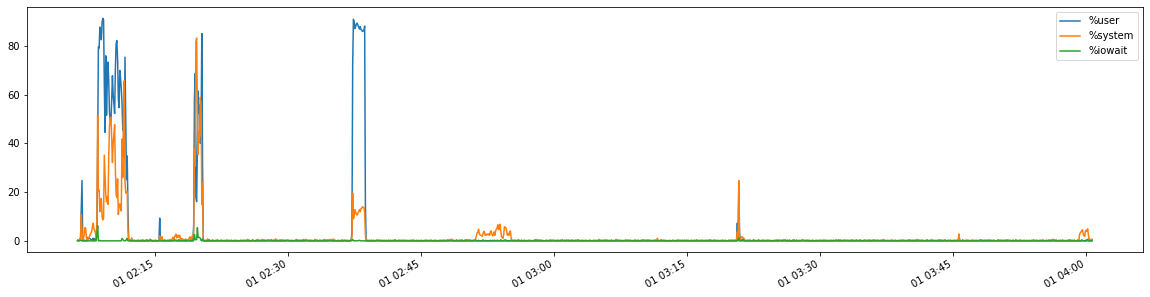

In [32]:
# 降采样前的原始数据
ans[['%user', '%system', '%iowait']].plot(figsize=(20, 5))

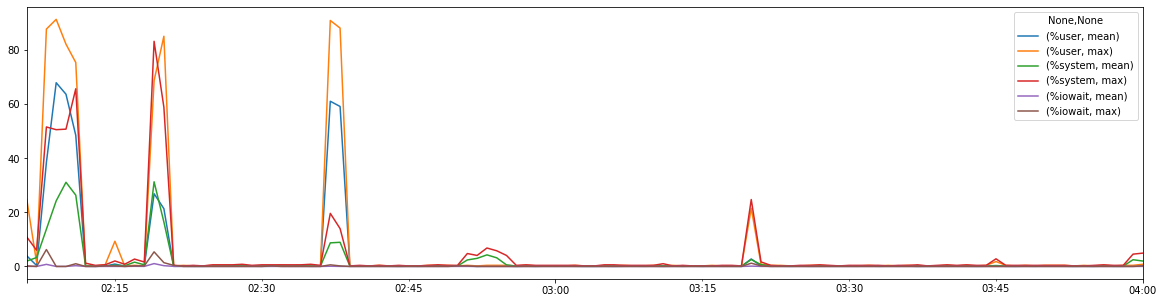

In [29]:
resampled_by_1min = ans.resample('1min')
aggregated_by_resampling = resampled_by_1min.agg(['mean', 'max'])

# 绘图以便对比原始数据
aggregated_by_resampling[['%user', '%system', '%iowait']].plot(figsize=(20, 5))

## 滚动

* 按每1分钟的窗口大小，对数据取滚动平均值和滚动最大值

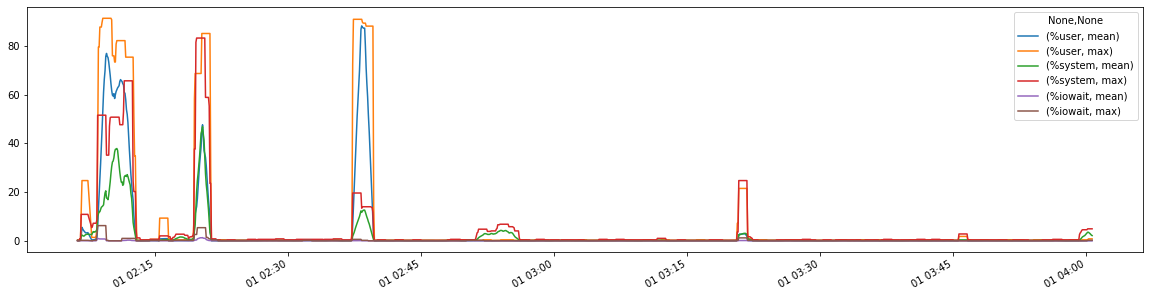

In [30]:
rolling_by_1min = ans.rolling('1min')
aggregated_by_rolling = rolling_by_1min.agg(['mean', 'max'])

# 绘图以便对比原始数据
aggregated_by_rolling[['%user', '%system', '%iowait']].plot(figsize=(20, 5))